# Gold price Prediction

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data loading and pre-processing

In [20]:
gold_dataset = pd.read_csv('gld_price_data.csv')

In [26]:
gold_dataset["Date"] = pd.to_datetime(gold_dataset["Date"])

In [27]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [28]:
gold_dataset.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


In [29]:
gold_dataset.shape

(2290, 6)

In [30]:
# checking misiing values
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Correlation
1. positive correlation
2. negative correlation

In [31]:
correlation = gold_dataset.corr()

<Axes: >

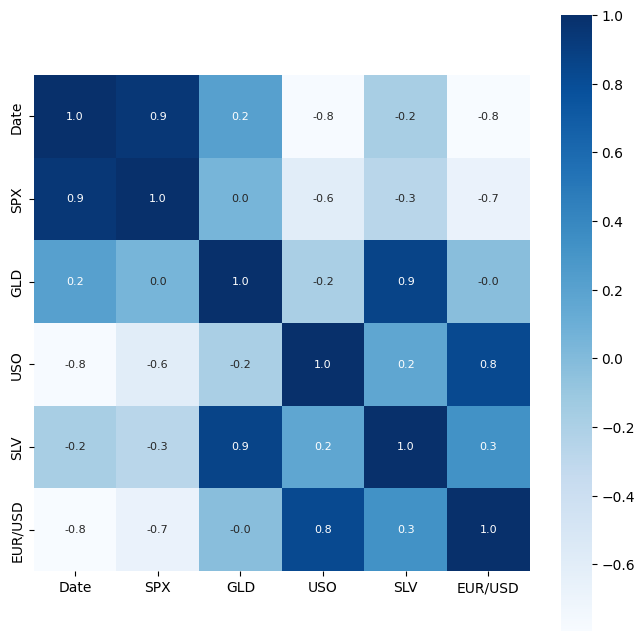

In [33]:
#heatmap for correlation

plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square= True, fmt=".1f", annot=True, annot_kws={'size' : 8}, cmap='Blues')

In [34]:
correlation['GLD']

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

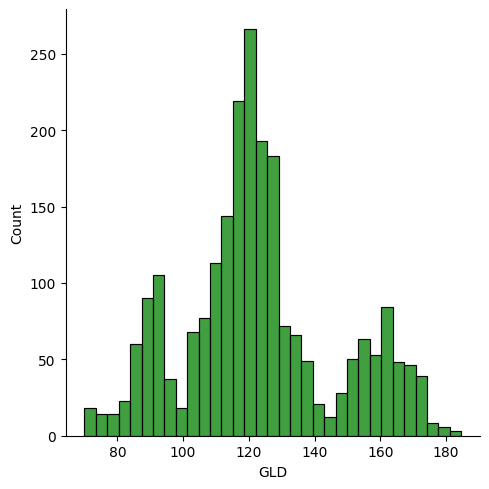

In [36]:
# distribution of gold price
sns.displot(gold_dataset['GLD'], color='green')

## Spliting Features

In [38]:
X = gold_dataset.drop(["Date", "GLD"], axis=1)
y = gold_dataset["GLD"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

## Model training and testing

In [42]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
test_pred = regressor.predict(X_test)
error_score = metrics.r2_score(y_test, test_pred)
print(f"R Square error : {error_score}")

R Square error : 0.9896604158227612


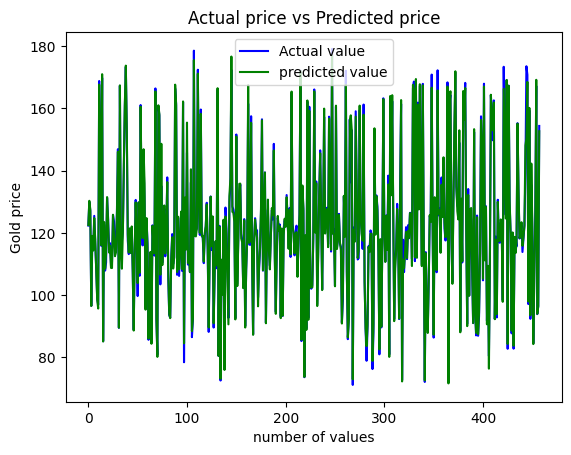

In [44]:
y_test = list(y_test)
plt.plot(y_test, color='blue', label= 'Actual value')
plt.plot(test_pred, color="green", label = "predicted value")
plt.title("Actual price vs Predicted price")
plt.xlabel("number of values")
plt.ylabel('Gold price')
plt.legend()
plt.show()